# **Create ML Mulitple Linear Regression Model Using SciKit Learn and LaRC/NASA and Solar Output data**
Output "pe_trained_linear.pickle" 

selected predictors:
- month
- hour
- ALLSKY_SFC_SW_DWN
- T2M
- RH2M

**Model Stats:**
Training Score: .73
Testing Score: .77


In [1]:
# dependencies
import pandas as pd
import numpy as np
import pickle

In [2]:
df = pd.read_csv('../csv_files/merged_data.csv')
df

,Time,year,month,day,hour,ALLSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_SRF_ALB,SZA,ALLSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,T2M,RH2M,PS,WD10M,Energy (Wh)
0,2020-09-01 06:00:00,2020,9,1,6,46.21,0.22,0.15,81.06,19.95,2.57,0.01,0.05,12.11,77.25,97.98,218.33,0
1,2020-09-01 07:00:00,2020,9,1,7,163.04,0.38,0.15,70.91,68.50,8.83,0.08,0.38,13.30,71.88,98.04,210.81,213
2,2020-09-01 08:00:00,2020,9,1,8,284.90,0.44,0.16,60.56,124.40,16.55,0.25,1.23,14.30,68.19,98.03,201.18,622
3,2020-09-01 09:00:00,2020,9,1,9,393.73,0.47,0.12,51.03,171.62,22.79,0.46,2.30,15.26,66.00,98.02,195.21,1104
4,2020-09-01 10:00:00,2020,9,1,10,476.48,0.49,0.14,43.10,212.40,29.03,0.70,3.52,17.13,61.12,97.94,188.93,2455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12427,2020-08-31 15:00:00,2020,8,31,15,431.70,0.58,0.16,55.80,188.50,25.20,0.46,2.27,20.28,44.25,97.79,293.90,4883
12428,2020-08-31 16:00:00,2020,8,31,16,283.93,0.52,0.17,65.88,123.42,15.94,0.20,0.95,18.98,53.19,97.82,291.28,3906
12429,2020-08-31 17:00:00,2020,8,31,17,170.59,0.55,0.19,76.45,71.92,8.26,0.04,0.23,18.39,58.88,97.84,287.26,1432
12430,2020-08-31 18:00:00,2020,8,31,18,31.04,0.42,0.15,86.84,10.45,1.24,0.00,0.02,15.51,71.00,97.87,283.99,654


In [3]:
# -999 signifies Nan - this is for hours outside of solar production range.  They are not necessary for the model.
clean_data = df[~df.eq(-999).any(1)]

In [4]:
# played with different predictors and settled on these
X = clean_data[[
    'month',
    # 'day',
    'hour',
    'ALLSKY_SFC_SW_DWN',
    # 'ALLSKY_KT',
    # 'SZA',
    'T2M',
    'RH2M'
    ]]
y = clean_data["Energy (Wh)"].values.reshape(-1, 1)
print(X.shape, y.shape)

(9162, 5) (9162, 1)


In [5]:
# set up training and testing data for scikit learn model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
# create model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [7]:
# fit model 
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7321649824682421
Testing Score: 0.7719649100945807


In [8]:
# export the model
with open('pe_trained_linear.pickle', 'wb') as file:
    pickle.dump(model, file)

In [8]:
# plot inline and import dependencies
%matplotlib inline
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Residual Plot')

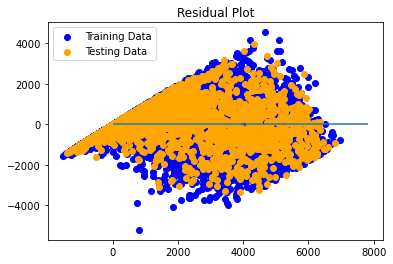

In [9]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [10]:
# import the model and test it
with open ('pe_trained_linear.pickle', 'rb') as file:
    loaded_model = pickle.load(file)

Text(0.5, 1.0, 'Residual Plot')

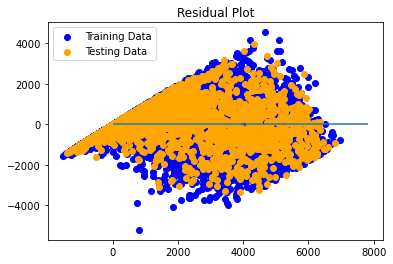

In [11]:
# test if model works
plt.scatter(loaded_model.predict(X_train), loaded_model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(loaded_model.predict(X_test), loaded_model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [12]:
# test model with my own imput - make sure it will work in api
# month": 9, "hour": 3, "ALLSKY_SFC_SW_DWN": 0.0, "T2M": 6.78, "RH2M": 86.44
p_values = [[9, 6, 32.48, 5.61, 88.38]]
loaded_model.predict(p_values)

array([[-839.41946945]])

In [13]:
# the model returns some negative values - I will need to convert these returns to 0 in the application as it is not possible to return negative energy
min(loaded_model.predict(X_train))

array([-1522.28236303])

In [14]:
# verify that negative values do not exist in output data - they do not
min(df['Energy (Wh)'])

0